In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Define Detector Response 
dE = 495e6 # total energy loss
n = dE/22 # number of electron-hole pairs created
vde = 1.42e5 # cm/s - drift velocity of electrons
E = 2600/(4.75) # V/cm - reduced electric field
print("Reduced Electric Field: ", round(E,3), "V cm^-1 Torr^-1")
print("Electron Drift Velocity (Sauli): ", vde, "cm/us")
tde = 4.75/vde # s
print("Total Electron Collection Time: ",round(tde*1e6,2),"us")
tdi = 10e3 # us
tau = 100e-6
e = 1.602e-19 # C charge of electron
def detectorI(t):
    I = n*e*vde*E - (n*e*vde*E/tde)*t
    return np.where(I>0,I,0)
def detectorIi(t):
    I = n*e*vde*E - (n*e*vde*E/tde)*t
    return np.where(I>0,I,0)
def preDecay(t):
    return np.exp(-t/tau)

Reduced Electric Field:  547.368 V cm^-1 Torr^-1
Electron Drift Velocity (Sauli):  150000.0 cm/us
Total Electron Collection Time:  31.67 us


Text(0, 0.5, 'Current (uA)')

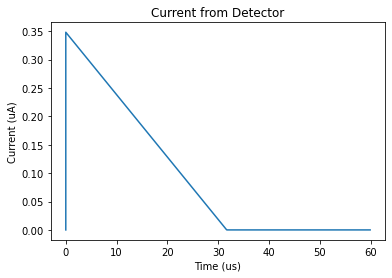

In [34]:
# Plot Detector Response
t = np.arange(0,60e-6,0.1e-6)
detI = np.insert(detectorI(t),0,0)
t = np.insert(t,0,0)
plt.plot(t*1e6, detI*1e6)
plt.title("Current from Detector")
plt.xlabel("Time (us)")
plt.ylabel("Current (uA)")

In [35]:
dt = (t[3]-t[2])
pt = np.arange(0,300e-6,0.1e-6)
charge = []
time = []
count = 0
for i in detI:
    charge.append(i*dt*preDecay(pt)/70000e-12)
    time.append(pt+dt*count)
    count+=1
    

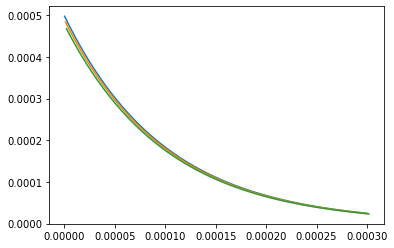

In [36]:
plt.plot(time[1], charge[1]*1e3)
plt.plot(time[10], charge[10]*1e3)
plt.plot(time[20], charge[20]*1e3)

In [37]:
newt = np.arange(0,time[len(time)-1][-1],dt)
print(len(newt), len(charge[0]))
ncharge = charge[1:len(charge)-1]
for i in range(len(ncharge)):
    #print(len(newt)-len(ncharge[i])-i)
    ncharge[i] = np.append(ncharge[i],np.zeros(len(newt)-len(ncharge[i])-i))
    zeros = np.zeros(i)

    # Concatenate the zeros array with the original array
    ncharge[i] = np.concatenate((zeros, ncharge[i]))

3599 3000


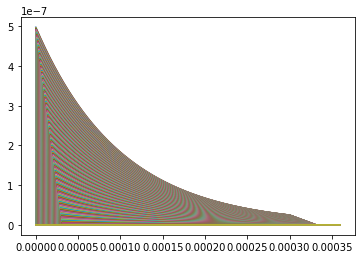

In [38]:
for c in ncharge:
    plt.plot(newt,c)

Text(0, 0.5, 'Vout of Preamplifier (mV)')

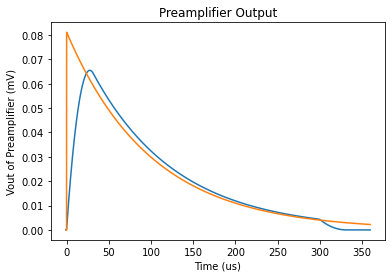

In [39]:
minust = np.arange(-dt*10,0,dt)
zerosf = np.zeros(len(minust))
time_ = np.concatenate((minust, newt))
vout = np.concatenate((zerosf, np.sum(ncharge, axis=0)))
Vo = V*preDecay(newt)
V_ = np.concatenate((np.zeros(len(minust)), Vo))
plt.plot(time_*1e6 , vout*1e3)
plt.plot(time_*1e6, V_*1e3)
plt.title("Preamplifier Output")
plt.xlabel("Time (us)")
plt.ylabel("Vout of Preamplifier (mV)")

In [40]:
newt[np.where(np.sum(ncharge, axis=0) == np.max(np.sum(ncharge,axis=0)))]

array([2.74e-05])

In [41]:
Q = (495e6/22)*e*vde*E*tde*1.03/2
print(Q)
V = Q/70000e-12
print(V*1e3)

5.678147647058824e-12
0.08111639495798319


In [42]:
(np.max(V)-np.max(np.sum(ncharge,axis=0)))/np.max(V)*100

19.24480476863205